<a href="https://colab.research.google.com/github/kartikey2807/Bike-Classification-1RT700/blob/main/ExpViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
* Predict if # of bikes needs to be increased at certain hours or not
* Data Exploration and Feaure Engineering
* Binary Classification Problem
* Train-validation set has *1600* records

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
overall_df = pd.read_csv('/content/training_data_fall2024.csv')
## Specify your filepath

In [4]:
overall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [5]:
int_features = [
'hour_of_day',
'day_of_week',
'month',
'holiday',
'weekday',
'summertime',
'snow']

In [6]:
con_features = [
'temp',
'dew',
'humidity',
'precip',
'snowdepth',
'windspeed',
'cloudcover',
'visibility']

## Data Split
Split data into:-
* Train set - 80%
* Validation set - 20%

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
bike_df, bike_validation_df = train_test_split(overall_df,
                                               test_size=0.2,
                                               random_state=42,
                                               stratify=overall_df['increase_stock'])

In [9]:
print(bike_df.shape) ## check shape
print(bike_df['increase_stock'].value_counts()) ## proportional split?

(1280, 16)
increase_stock
low_bike_demand     1050
high_bike_demand     230
Name: count, dtype: int64


In [10]:
print(bike_validation_df.shape) ## check shape
print(bike_validation_df['increase_stock'].value_counts())

(320, 16)
increase_stock
low_bike_demand     262
high_bike_demand     58
Name: count, dtype: int64


## Data Exploration and Visualization
* Draw *pairplot* for continuous features
* Draw *boxplot* for label *increase_stock*
* Draw *boxplot* for categorical features
* Figure out data imbalance and how to handle it
* Outliers

<Figure size 1500x1500 with 0 Axes>

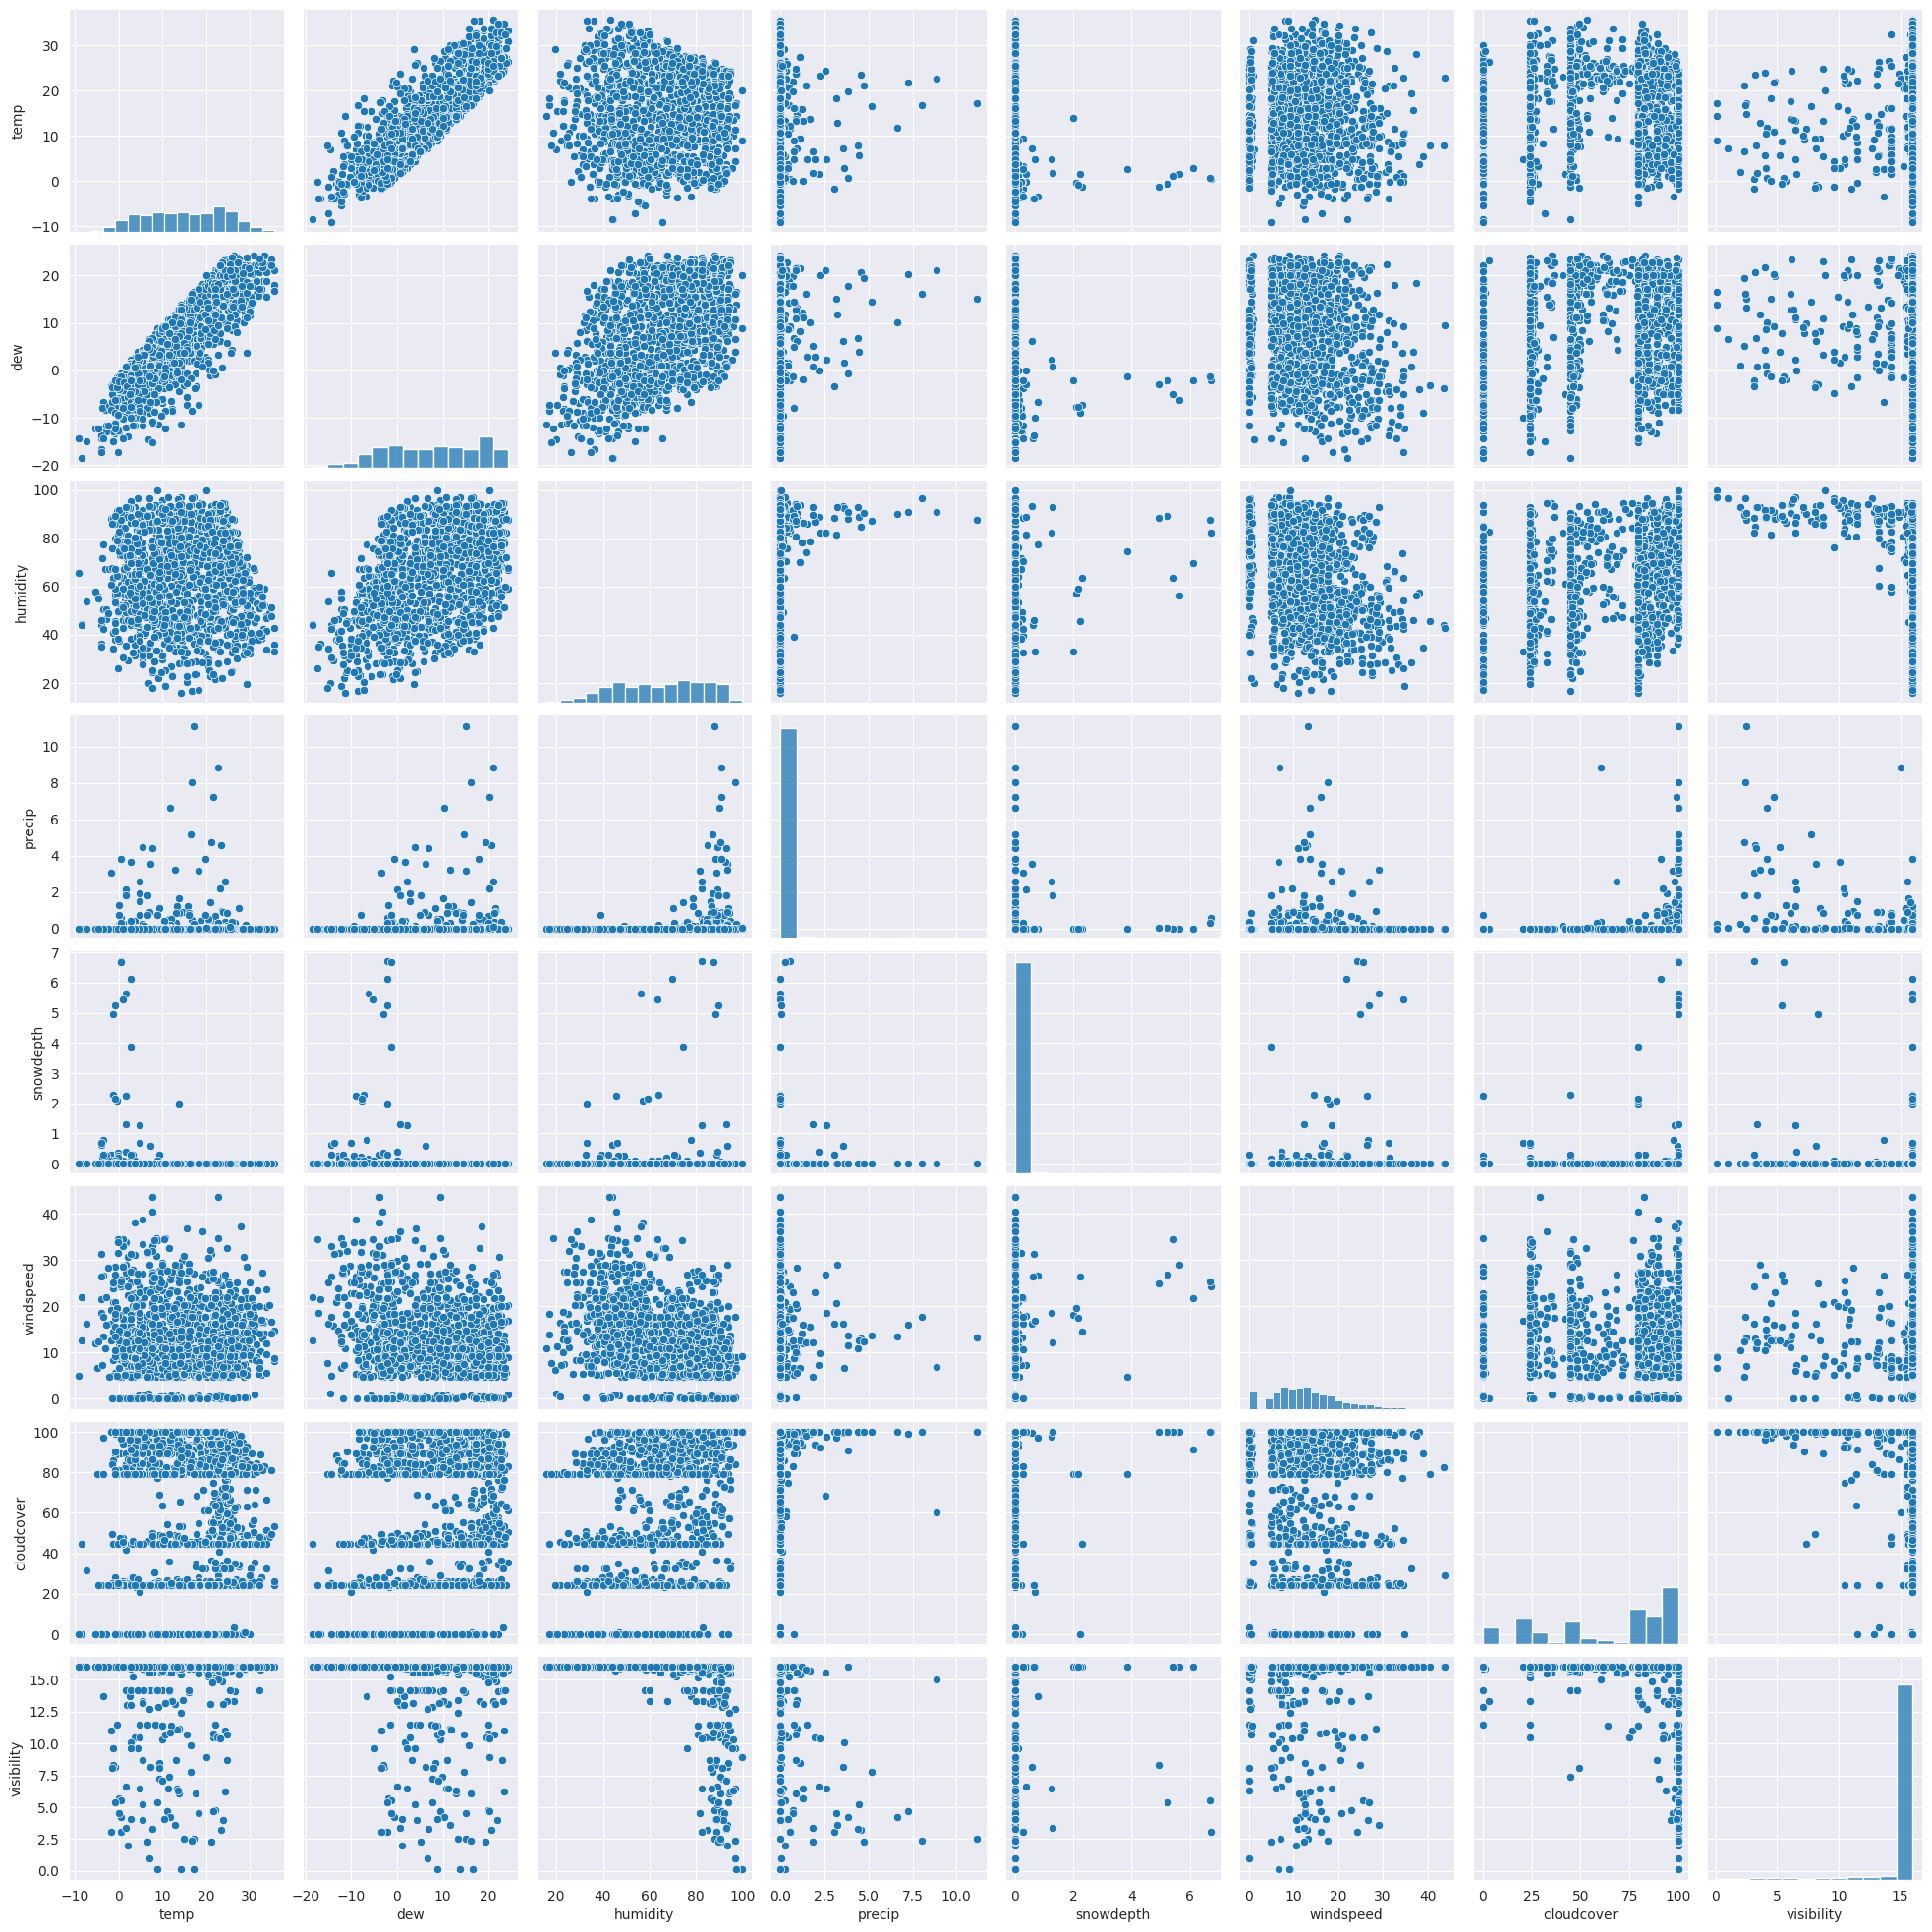

In [11]:
sns.set_style('darkgrid')

temp = con_features.copy()
temp.pop(-1) # visibility
temp.pop(-1) # cloudcover
temp.pop(-2) # snowdepth


plt.figure(figsize=(15,15))
sns.pairplot(data=bike_df, vars=con_features, kind='scatter')

<Axes: title={'center': 'Heatmap Estimate of features'}>

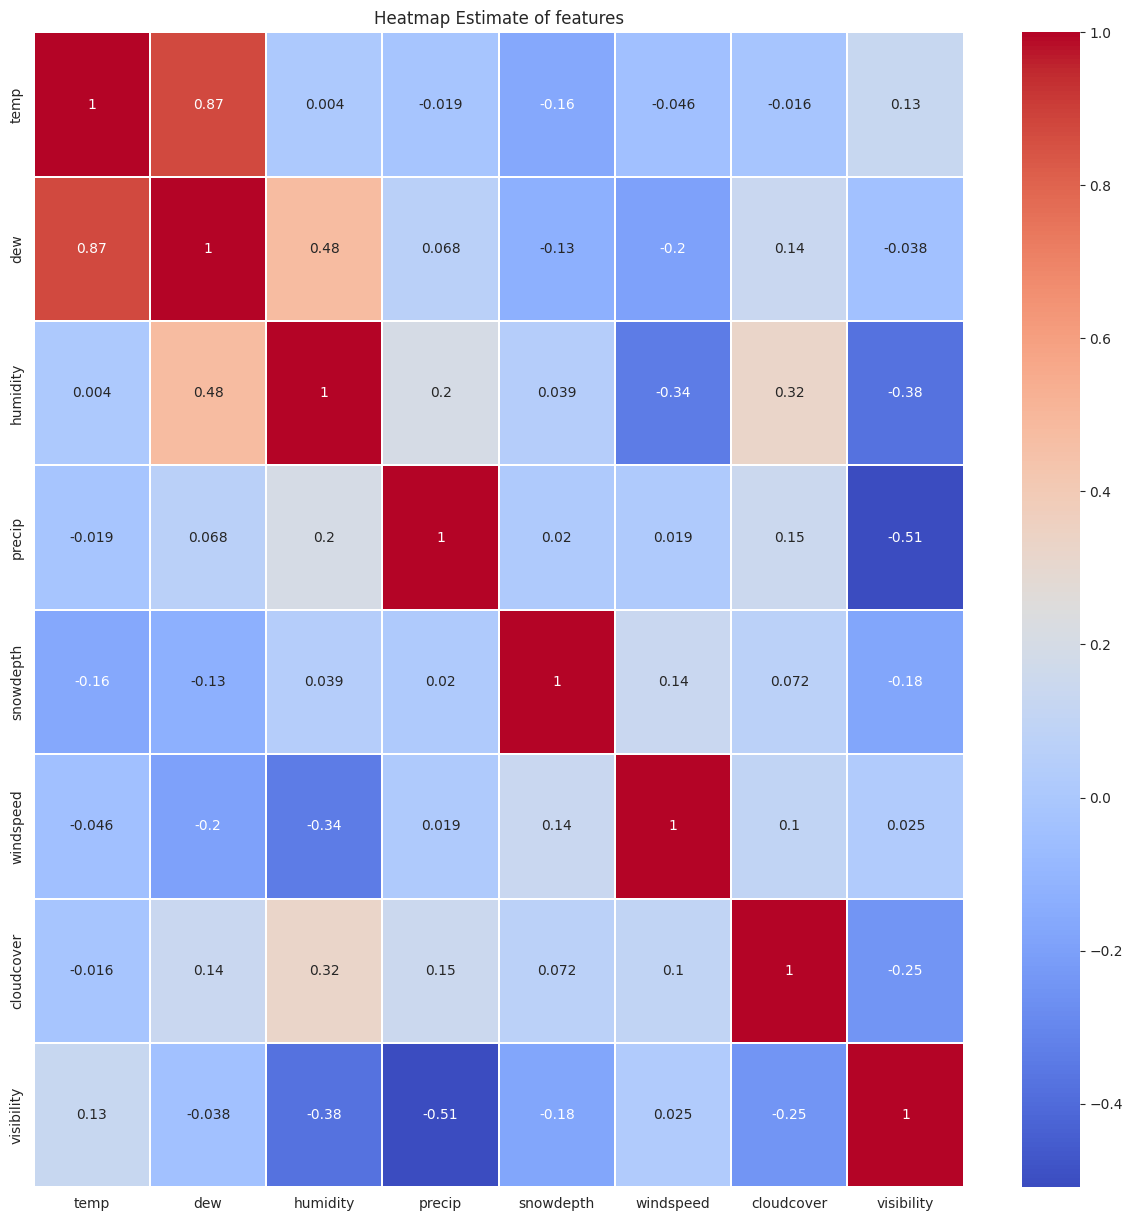

In [12]:
## verify using heatmap
## draw a covariance matrix
plt.figure(figsize=(15,15))

plt.title('Heatmap Estimate of features')
bike_cm = bike_df.loc[:,con_features].corr()
sns.heatmap(bike_cm, annot=True, cmap='coolwarm', linewidth=0.2)

## Correlation

| Feature 1 | Feature 2 | Covariance coeff |
|--|--|--|
| temp | dew | 0.87 |
| dew | humidity | 0.48 |
| humidity | cloudcover | 0.32 |
| humidity | windspeed | 0.34 (-ve)|
| humidity | visibility | 0.38 (-ve) |
| precip | visibility | 0.51 (-ve) |

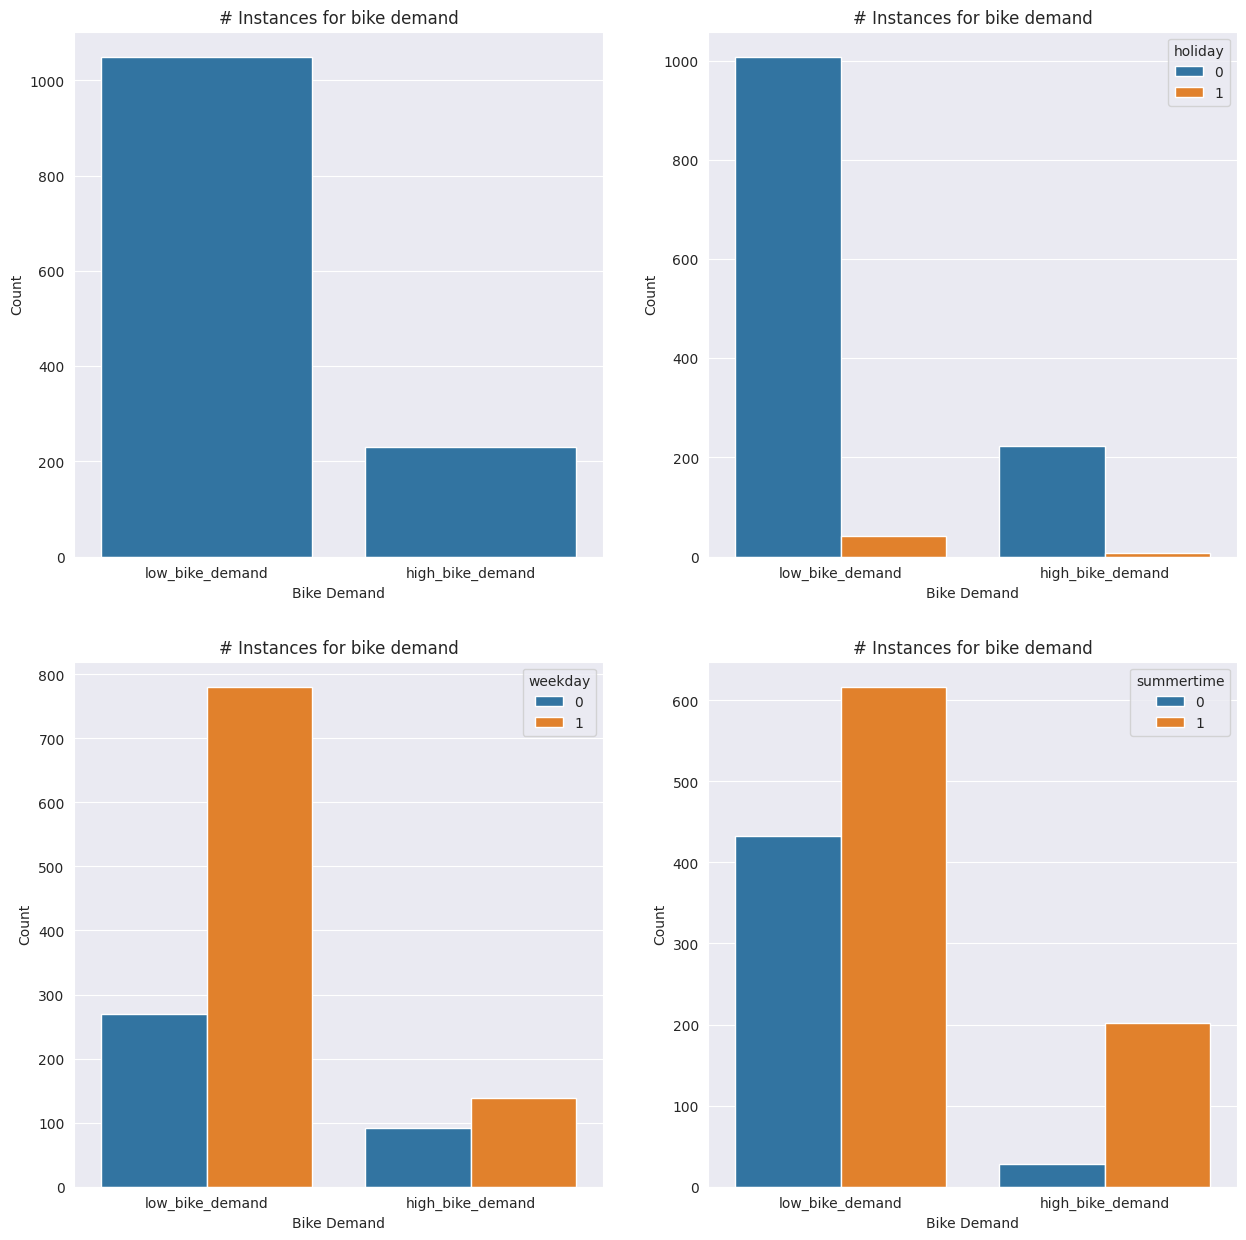

In [13]:
## Look at distribution for the label
## And it's relation with continuous
## features. Plot it's relation with
## respect to temporal data.

fig, axes = plt.subplots(2, 2, figsize=(15,15))

hue_label = [
    [None, 'holiday'],
    ['weekday', 'summertime']]

for i in range(2):
    for j in range(2):

        axes[i,j].set_title('# Instances for bike demand')
        sns.countplot(data=bike_df,
                      x=bike_df.loc[:,'increase_stock'],
                      order=['low_bike_demand','high_bike_demand'],
                      hue=hue_label[i][j], ax=axes[i,j])

        axes[i,j].set_xlabel('Bike Demand')
        axes[i,j].set_ylabel('Count')

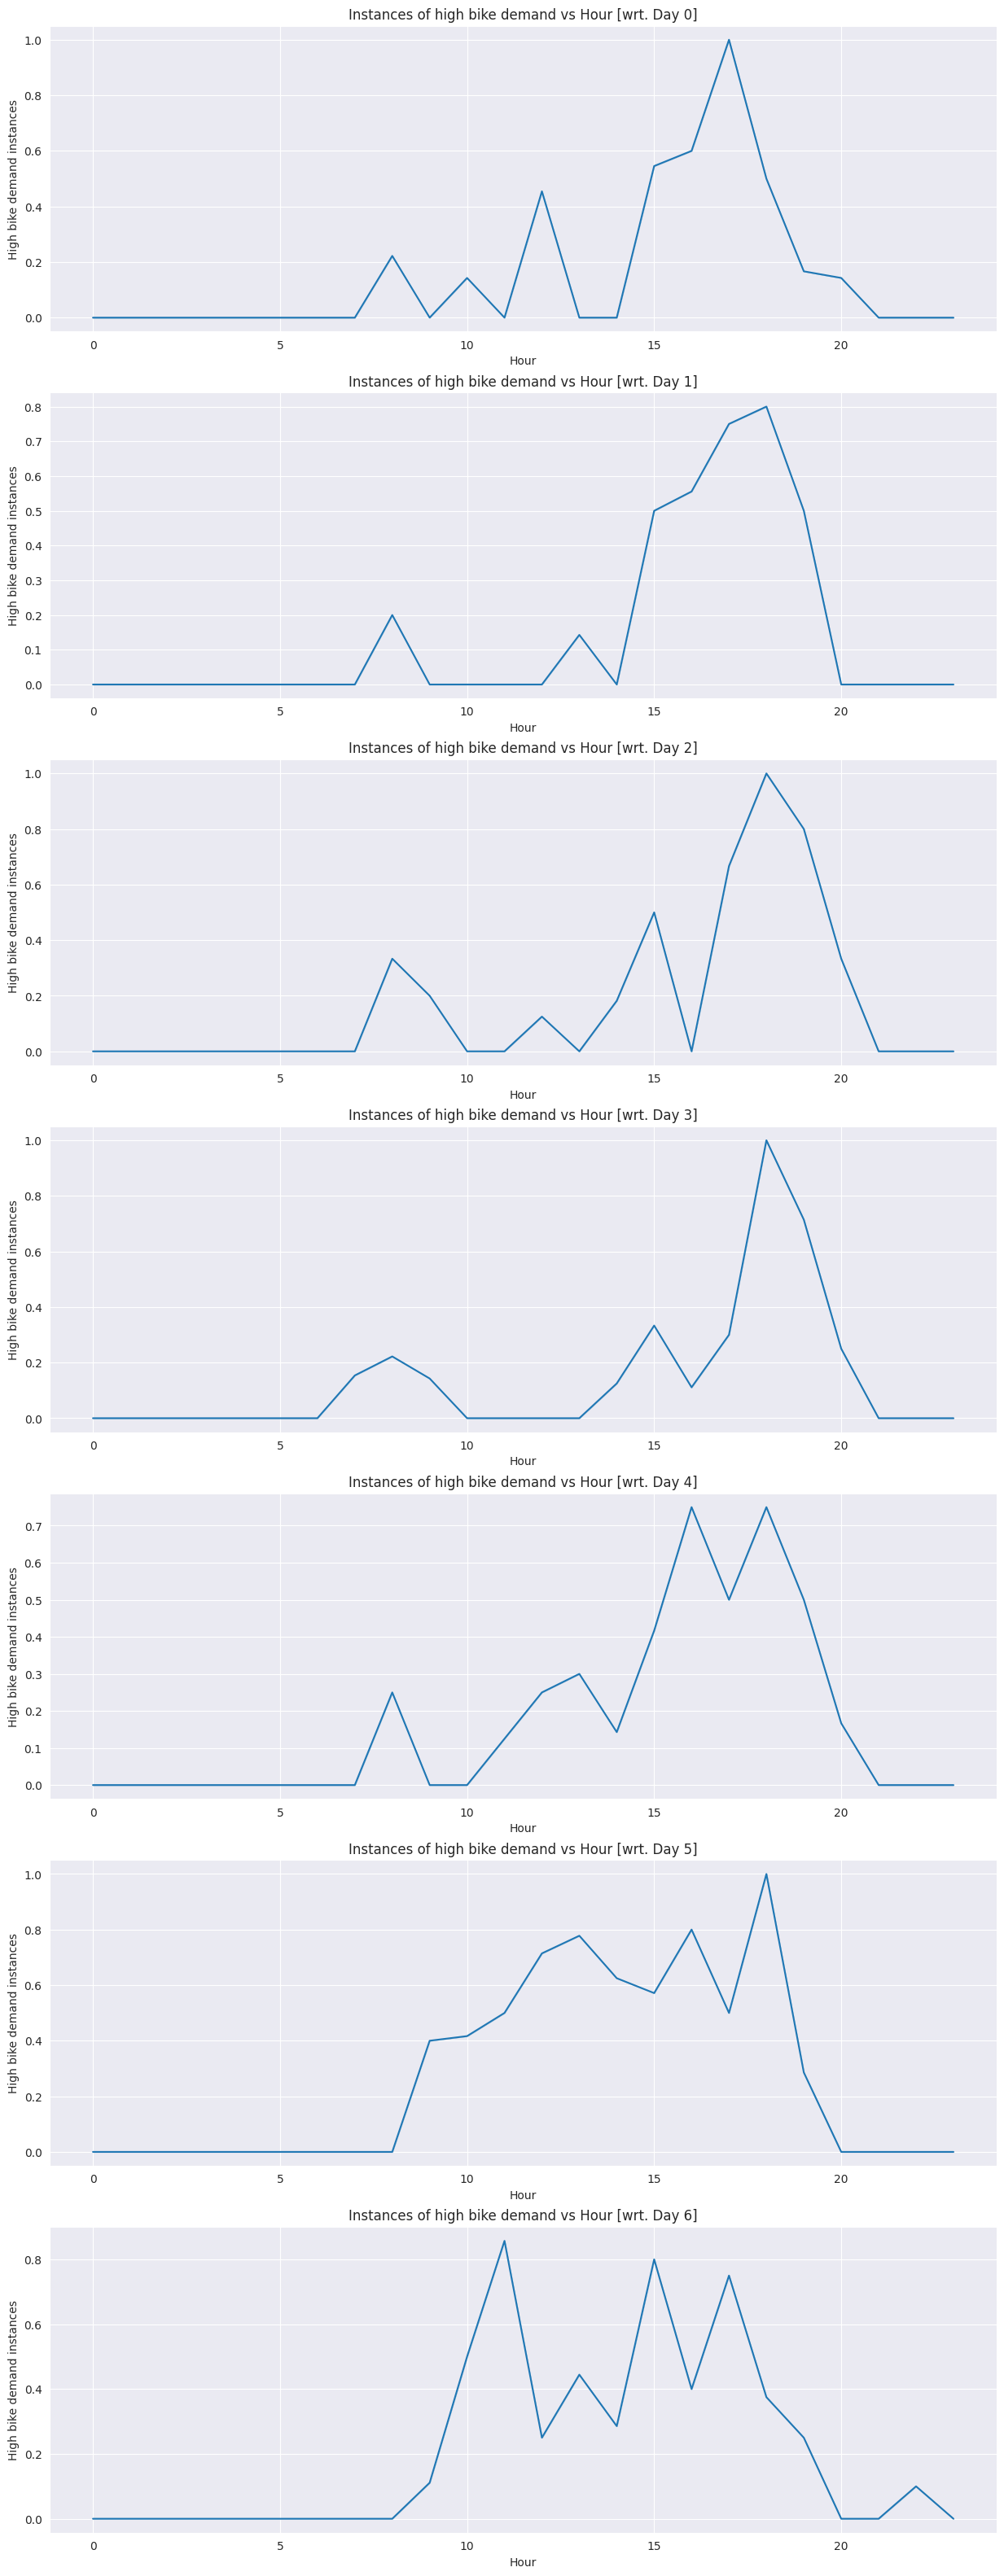

In [14]:
fig, axes = plt.subplots(7,1,figsize=(15,40)) # row-wise
label_rep = {'low_bike_demand':0, 'high_bike_demand': 1}
for val in bike_df['day_of_week'].sort_values().unique():

    axes[int(val)].set_title(f'Instances of high bike demand vs Hour [wrt. Day {val}]')

    indexes = bike_df.index[bike_df.loc[:,'day_of_week']==val]
    sns.lineplot(data=bike_df,
                 x=bike_df.loc[:,'hour_of_day'],
                 y=bike_df.loc[indexes,'increase_stock'].replace(label_rep),
                 estimator='mean', ax=axes[int(val)],errorbar=('ci',False))

    axes[int(val)].set_xlabel('Hour')
    axes[int(val)].set_ylabel('High bike demand instances')

Text(0, 0.5, 'High bike demand instances')

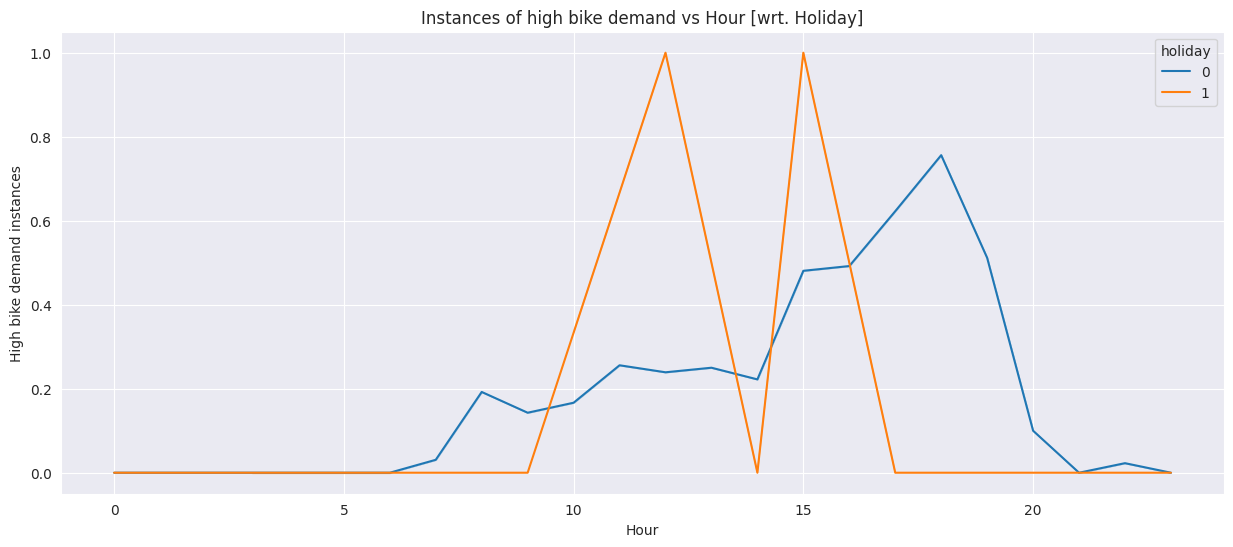

In [15]:
plt.figure(figsize=(15,6))

plt.title('Instances of high bike demand vs Hour [wrt. Holiday]')
sns.lineplot(data=bike_df,
             x=bike_df.loc[:,'hour_of_day'],
             hue='holiday',
             y=bike_df.loc[:,'increase_stock'].replace(label_rep),
             estimator='mean',
             errorbar=('ci',False))

plt.xlabel('Hour')
plt.ylabel('High bike demand instances')

Text(0, 0.5, 'High bike demand instances')

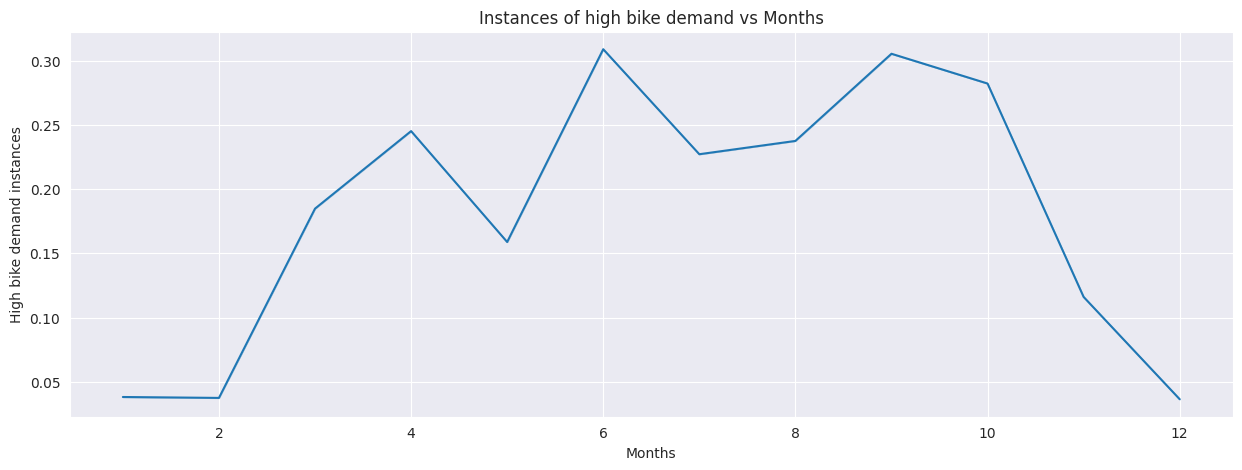

In [16]:
plt.figure(figsize=(15,5))

sns.lineplot(data=bike_df,
             x=bike_df.loc[:,'month'],
             y=bike_df.loc[:,'increase_stock'].replace(label_rep),
             estimator='mean',errorbar=('ci',False))

plt.title('Instances of high bike demand vs Months')
plt.xlabel('Months')
plt.ylabel('High bike demand instances')

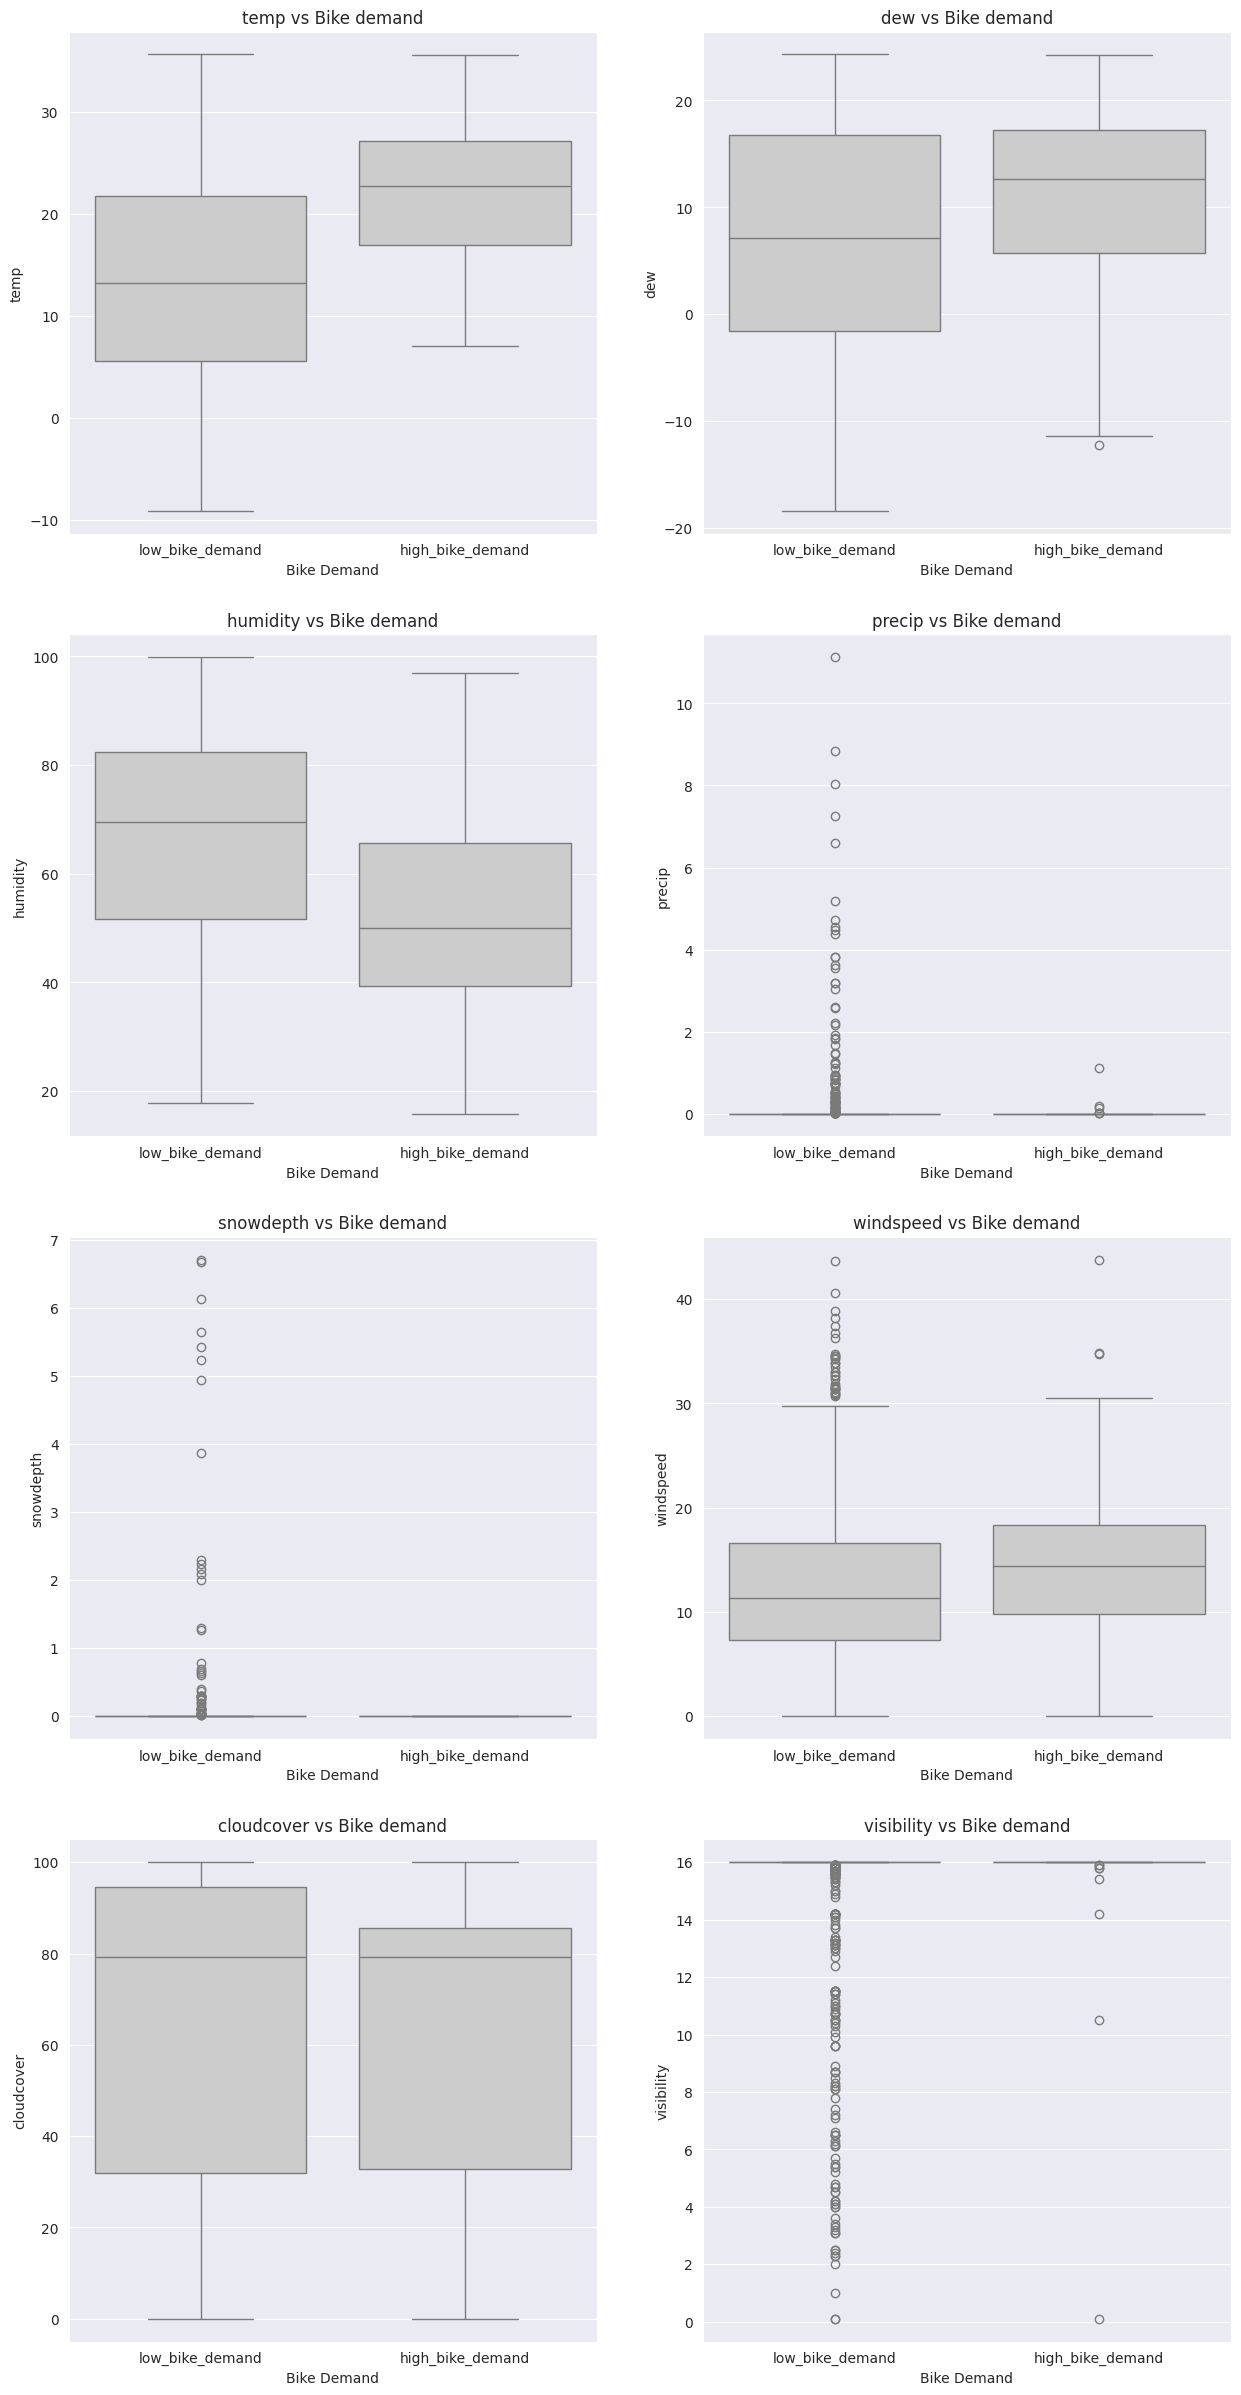

In [17]:
## labels vs continuous variables
## we can drop
con_features_np = np.array(con_features).reshape(4,2)

fig, axes = plt.subplots(4,2,figsize=(15,30))

for i in range(4):
    for j in range(2):
        axes[i,j].set_title(f'{con_features_np[i,j]} vs Bike demand')
        sns.boxplot(data=bike_df, x=bike_df.loc[:,'increase_stock'], y=bike_df.loc[:,con_features_np[i,j]],
                    order=['low_bike_demand','high_bike_demand'], ax=axes[i,j], color="0.8")

        axes[i,j].set_xlabel('Bike Demand')
        axes[i,j].set_ylabel(f'{con_features_np[i,j]}')

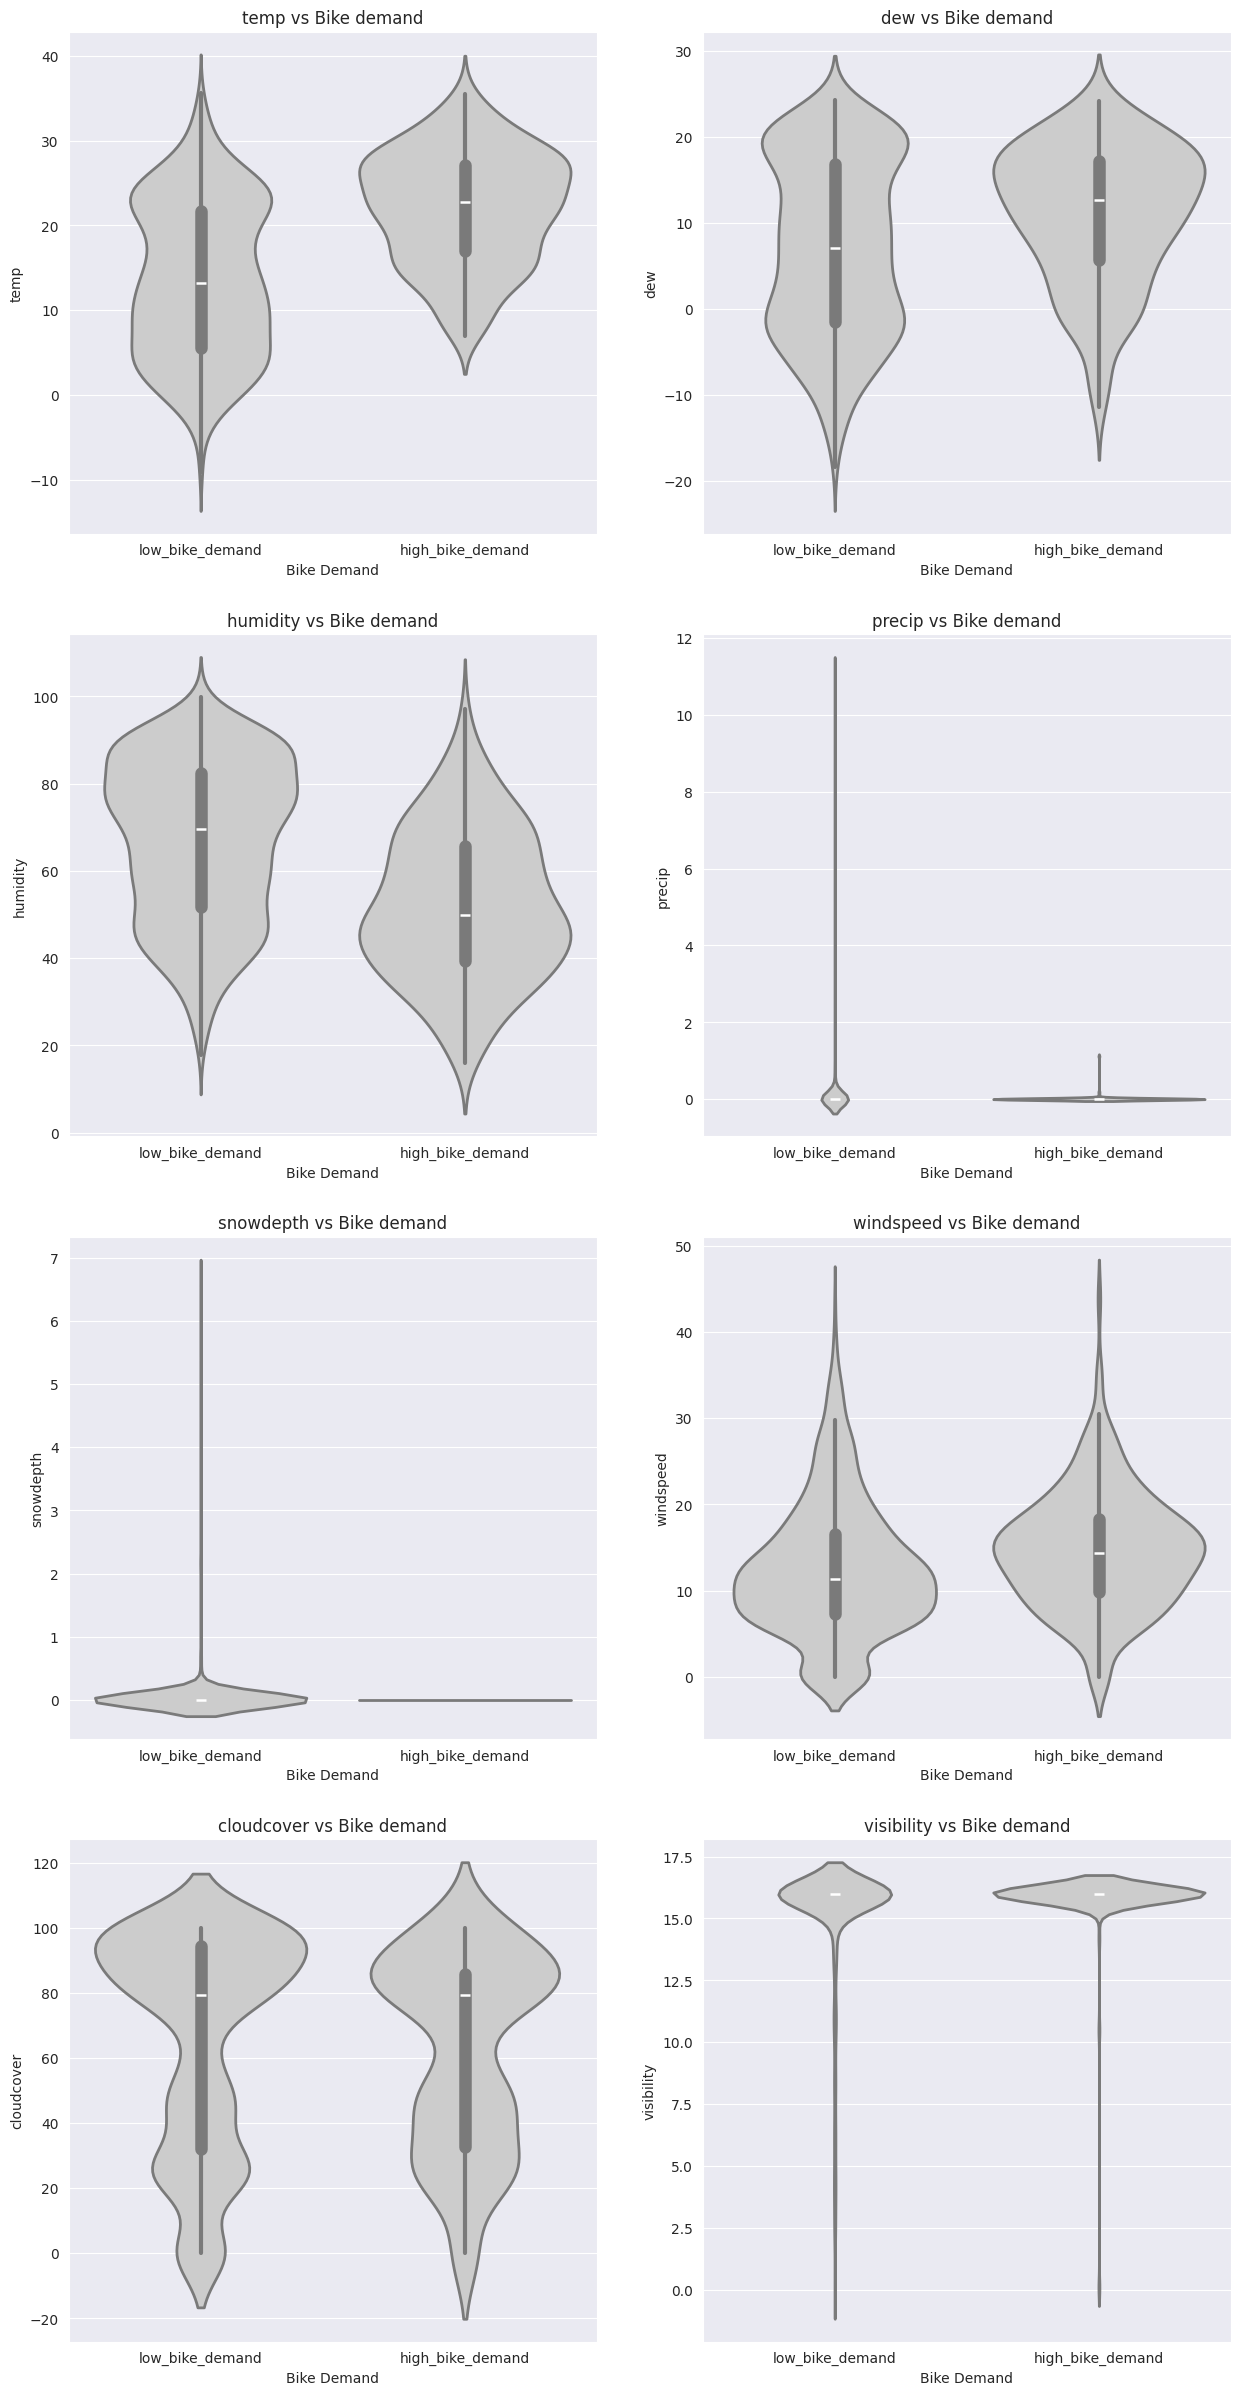

In [18]:
## labels vs continuous variables
## we can drop
con_features_np = np.array(con_features).reshape(4,2)

fig, axes = plt.subplots(4,2,figsize=(15,30))

for i in range(4):
    for j in range(2):
        axes[i,j].set_title(f'{con_features_np[i,j]} vs Bike demand')
        sns.violinplot(data=bike_df,x=bike_df.loc[:,'increase_stock'],y=bike_df.loc[:,con_features_np[i,j]],
                       order=['low_bike_demand','high_bike_demand'],ax=axes[i,j], linewidth=2,color="0.8")

        axes[i,j].set_xlabel('Bike Demand')
        axes[i,j].set_ylabel(f'{con_features_np[i,j]}')

## Observation 1.1
* *temp* and *dew* have linear +ve correlation.
* Correlation threshold assumed at 0.8.
* low_bike_demand (1050) >> high_bike_demand (230)
* More *high_bike_demand* instances in summers than in winters.

## Observation 1.2

**Monday-Friday**

* *high_bike_demand* instances between 6AM and 9PM.
* Graph flatlines <6AM and >9PM.
* Count of instances peaks between 5PM and 7PM.

**Weekends**
* There are instances between 8AM and 8PM.

**Holidays**
* Instances between 9AM and 5PM.
* Peak shifts between 10AM and 3PM.
* **Valley** -> could be the time when people are hanging out in pubs and bars.

## Observation 1.3

**Conditions favoring high_bike_demand**
* high temperature
* high dew point
* low relative humidity
* higher median windspeed
* Outliers exists for **precip**, **windspeed**, **snowdepth** and **visibility**. \[Boxplot\]
---